# **[Clustering] Submission Akhir BMLP_Ananta Boemi Adji**

## **INFORMASI DATASET**

### **Latar Belakang**
Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

---

## **Tujuan Proyek**
Tujuan dari Proyek ini adalah untuk bisa:
- Menerapkan teknik **clustering** untuk membentuk **segmentasi pelanggan**.
- Mengidentifikasi karakteristik masing-masing cluster berdasarkan atribut transaksi.
- Memberikan insight yang dapat digunakan dalam pengambilan keputusan strategis.

---

## **Struktur Dataset**
Dataset yang digunakan merupakan data transaksi bank hasil modifikasi, yang terdiri dari beberapa fitur numerik dan kategorikal. Berikut ini adalah beberapa kolom yang terdapat dalam dataset ini:

- `amount`: Nominal transaksi.
- `category`: Kategori transaksi (misal: groceries, bills, dll).
- `merchant`: Nama merchant tempat transaksi dilakukan.
- `type`: Tipe transaksi (debit/kredit).
- `gender`: Jenis kelamin nasabah.
- `age`: Usia nasabah.
- `city`: Kota tempat tinggal nasabah.
- `lat`, `long`: Koordinat geografis lokasi transaksi.

---

## **Alur Proyek Clustering**
Untuk alur pengerjaan yang saya lakukan disini adalah sebagai berikut:
1. **Exploratory Data Analysis (EDA):**
   - Menampilkan informasi awal dataset
   - Visualisasi distribusi data
   - Korelasi antar fitur

2. **Preprocessing:**
   - Penanganan missing values dan duplikasi
   - Feature encoding & scaling
   - Binning & outlier handling

3. **Modeling:**
   - Menentukan jumlah cluster optimal
   - Membangun model clustering (KMeans)
   - Visualisasi hasil clustering
   - Evaluasi menggunakan silhouette score

4. **Interpretasi & Simpan Model:**
   - Interpretasi karakteristik masing-masing cluster
   - Simpan model clustering
   - Simpan data hasil clustering

---

## **Penilaian yang saya harap bisa tercukup dari project ini**
- Mencakup visualisasi EDA yang lengkap dan informatif
- Menggunakan metode validasi jumlah cluster secara tepat
- Menyediakan interpretasi dan penyimpanan model yang rapi

# **1. Import Library**

Pada tahap ini, seluruh library yang digunakan dalam proyek clustering ini diimpor dalam satu cell.

Library yang digunakan mencakup:
- `pandas`, `numpy` untuk manipulasi data
- `matplotlib`, `seaborn` untuk visualisasi
- `sklearn` untuk preprocessing, clustering, dan evaluasi model
- `joblib` untuk menyimpan model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**

Pada tahap ini, dataset dimuat ke dalam notebook untuk dilakukan peninjauan awal sebelum dilakukan pembersihan dan pemrosesan lebih lanjut.

Langkah-langkah yang dilakukan:
1. Menampilkan 5 baris pertama data menggunakan `head()`
2. Melihat informasi struktur dataset menggunakan `info()`
3. Menampilkan statistik deskriptif dengan `describe()`

Untuk dataset disini saya menggunakan sumber yang sudah diberikan langsung oleh team dicoding:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

**Insight**:
- Dataset memiliki 2.537 baris dan 16 kolom.
- Terdapat missing value di hampir semua kolom, terutama pada TransactionID, AccountID, dan kolom-kolom lain yang berkisar sedikit missing (~20-30 data hilang).
- Sebagian besar kolom bertipe objek (categorical/text), sisanya numerik.
- Kolom ID seperti TransactionID, AccountID, DeviceID, IP Address, MerchantID perlu di-drop saat preprocessing sesuai ketentuan.

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


**Insight**:
- TransactionAmount rata-rata sekitar 298 dengan rentang dari 0.26 sampai hampir 1.920.
- CustomerAge berkisar antara 18 sampai 80 tahun, dengan rata-rata 44.7 tahun.
- TransactionDuration rata-rata 119 detik, rentang 10–300 detik, relatif konsisten dengan std dev 70.
- LoginAttempts sebagian besar 1 kali, max hanya 5 kali, menunjukkan mayoritas transaksi dengan 1 percobaan login.

Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA)

**Biarkan kosong jika tidak menerapkan kriteria skilled**

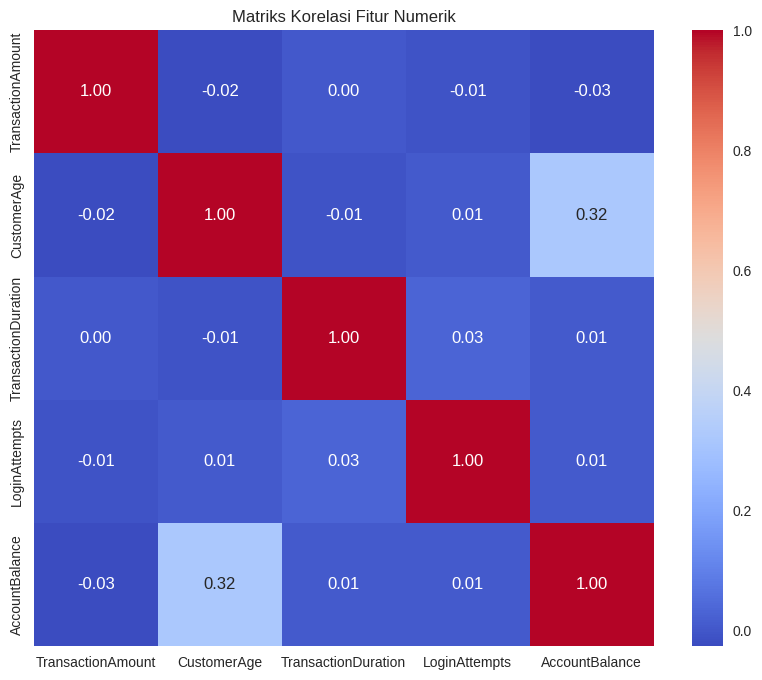

In [6]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

**Insight**: Metrik korelasi yang terlihat paling tinggi adalah umur dari pengguna dengan account balance mereka.

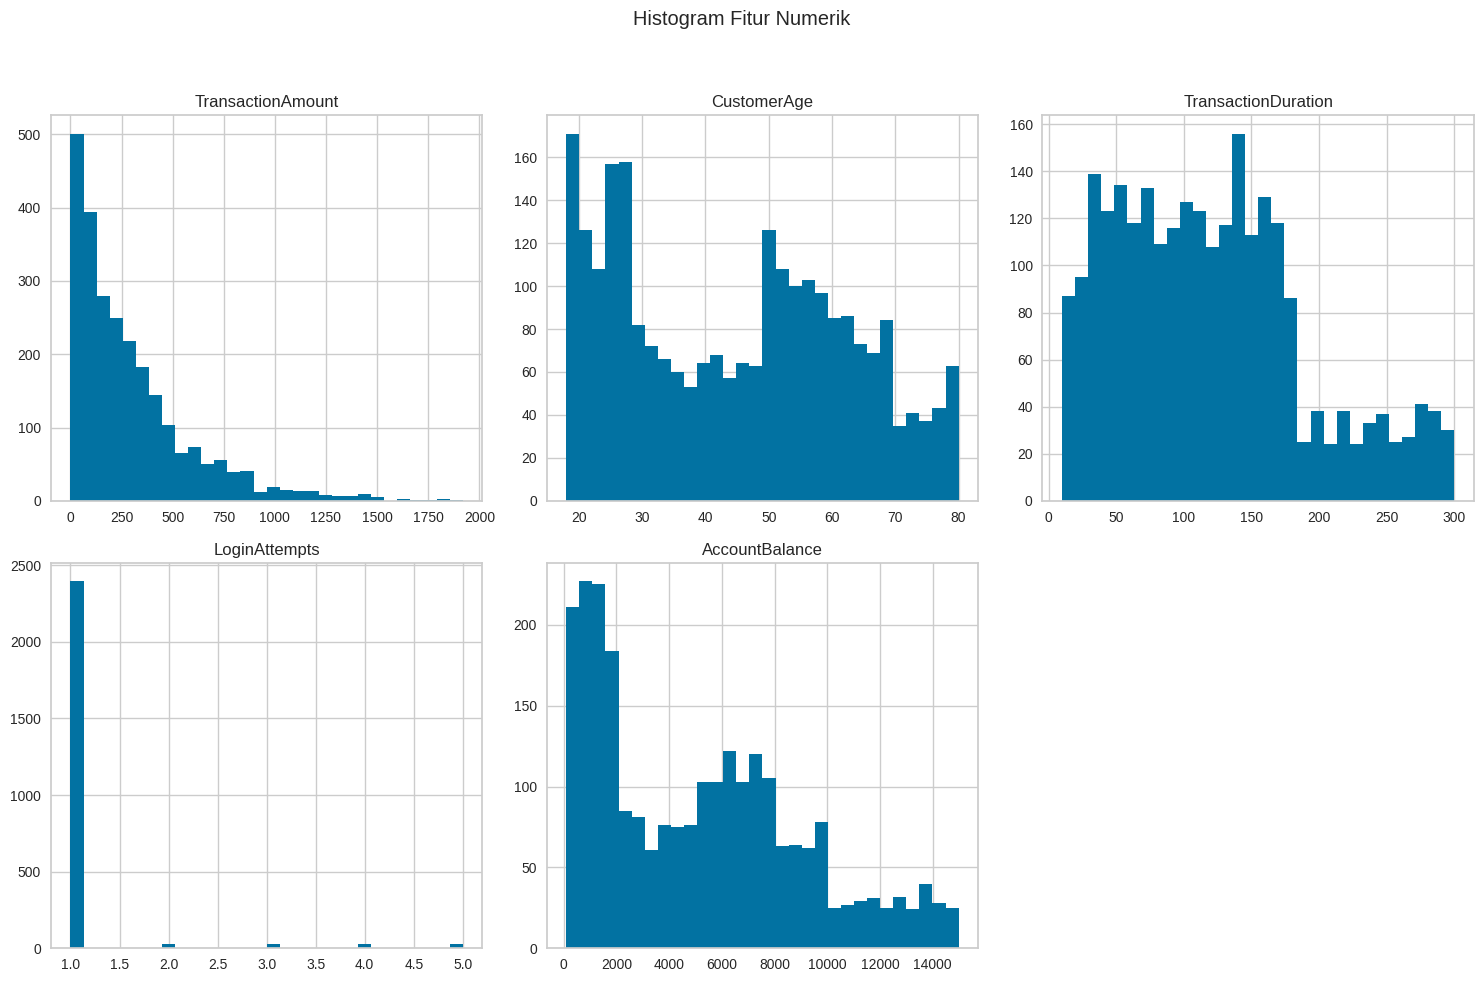

In [7]:
df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(len(numerical_cols)//3 + 1, 3))
plt.suptitle('Histogram Fitur Numerik')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

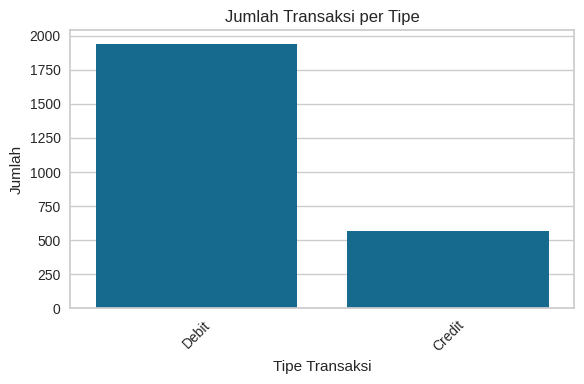

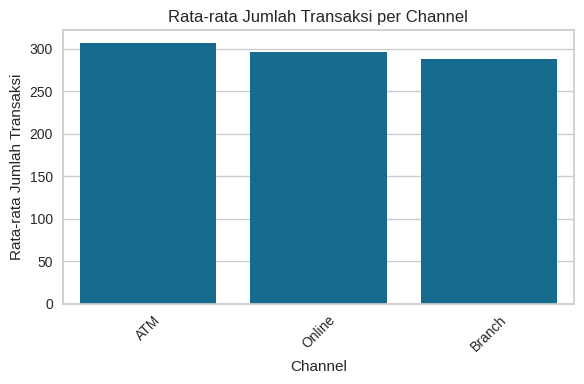

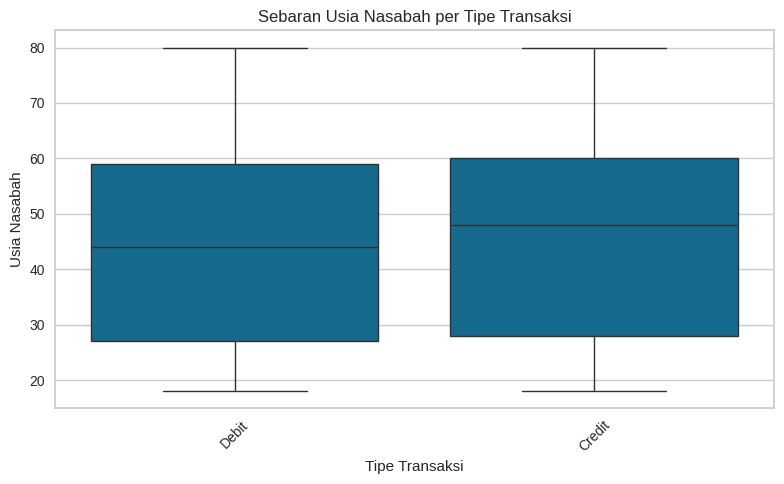

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TransactionType', order=df['TransactionType'].value_counts().index)
plt.title('Jumlah Transaksi per Tipe')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
avg_amount_by_channel = df.groupby('Channel')['TransactionAmount'].mean().sort_values(ascending=False)
sns.barplot(x=avg_amount_by_channel.index, y=avg_amount_by_channel.values)
plt.title('Rata-rata Jumlah Transaksi per Channel')
plt.xlabel('Channel')
plt.ylabel('Rata-rata Jumlah Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='TransactionType', y='CustomerAge')
plt.title('Sebaran Usia Nasabah per Tipe Transaksi')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Usia Nasabah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Tahap selanjutnya adalah **Pembersihan Dataset** urutan dan tahap sebagai berikut:
1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**

In [9]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
df.duplicated().sum()

np.int64(21)

In [11]:
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df[numerical_cols].head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,NaN,0.648276,0.0,0.492591


In [12]:
df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'], inplace=True)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [13]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [14]:
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

Pembersihan dan Pra Pemrosesan Data [Skilled]


In [15]:
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Pembersihan dan Pra Pemrosesan Data [Advanced]

In [17]:
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['TransactionAmount'] < lower_bound) | (df['TransactionAmount'] > upper_bound)]
print(f"Jumlah outlier pada TransactionAmount: {len(outliers)}")

df = df[(df['TransactionAmount'] >= lower_bound) & (df['TransactionAmount'] <= upper_bound)]

Jumlah outlier pada TransactionAmount: 113


In [18]:
bins_age = [0, 30, 60, 100]
labels_age = ['Muda', 'Dewasa', 'Tua']
df['AgeGroup'] = pd.cut(df['CustomerAge'] * (60) + 18, bins=bins_age, labels=labels_age)

bins_login = [0, 1, 3, 5]
labels_login = ['Rendah', 'Sedang', 'Tinggi']
df['LoginFreq'] = pd.cut(df['LoginAttempts'] * 4 + 1, bins=bins_login, labels=labels_login)

df['AgeGroup'] = LabelEncoder().fit_transform(df['AgeGroup'])
df['LoginFreq'] = LabelEncoder().fit_transform(df['LoginFreq'])

df[['CustomerAge', 'AgeGroup', 'LoginAttempts', 'LoginFreq']].head()

,CustomerAge,AgeGroup,LoginAttempts,LoginFreq
0,0.838710,2,0.0,0
1,0.806452,2,0.0,0
2,0.016129,1,0.0,0
3,0.129032,1,0.0,0
4,0.435484,0,0.0,0


**Report**:
- Nilai CustomerAge dan LoginAttempts sudah dalam bentuk normalisasi (0–1) dari tahap scaling.
- Encoding dilakukan setelah binning agar bisa dilatih oleh model.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,LoginFreq
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,0.132555,1249.758017,0.786756,21.279050,1.010829,0.430076,1.528113,0.377291,0.030508,0.338435,180.855060,0.727613,0.072470
std,0.112426,724.827548,0.439137,12.383373,0.828583,0.285457,1.150426,0.240561,0.148538,0.260681,103.671696,0.783119,0.341193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040993,625.000000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.095959,92.000000,0.000000,0.000000
50%,0.104010,1243.000000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.311416,181.000000,1.000000,0.000000
75%,0.193454,1880.000000,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.506899,271.000000,1.000000,0.000000
max,0.467223,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000,2.000000,2.000000


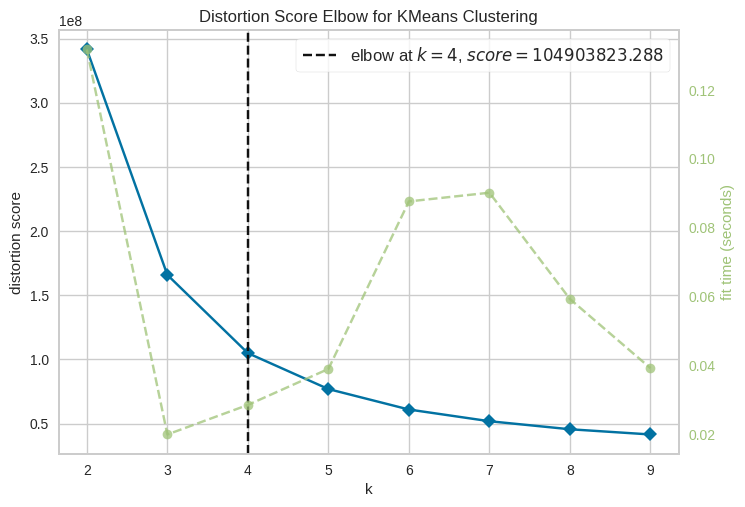

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df)
visualizer.show()

In [21]:
model_kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
model_kmeans.fit(df)

KMeans(n_clusters=np.int64(4), random_state=42)

Menyimpan model hasil modelling.

In [22]:
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

Membangun Model Clustering [Skilled]

In [23]:
score = silhouette_score(df, model_kmeans.labels_)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.4985


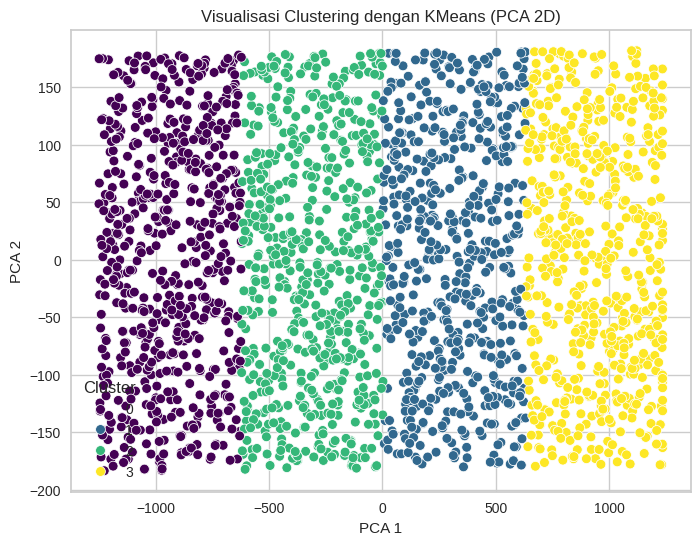

In [24]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)
cluster_labels = model_kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=cluster_labels, palette='viridis', s=50)
plt.title('Visualisasi Clustering dengan KMeans (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

Membangun Model Clustering [Advanced]

In [25]:
pca_model = PCA(n_components=2)
df_pca = pca_model.fit_transform(df)

model_kmeans_pca = KMeans(n_clusters=model_kmeans.n_clusters, random_state=42)
model_kmeans_pca.fit(df_pca)

KMeans(n_clusters=np.int64(4), random_state=42)

In [26]:
joblib.dump(pca_model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.

In [27]:
df_clustered = df.copy()
df_clustered['Target'] = model_kmeans.labels_

cluster_summary = df_clustered.groupby('Target').agg(['mean', 'min', 'max'])
cluster_summary

TransactionAmount                     TransactionDate              \
                    mean       min       max            mean   min   max   
Target                                                                     
0               0.134006  0.000313  0.457331      313.925497     0   628   
1               0.136975  0.000031  0.463168     1565.302365  1253  1881   
2               0.131434  0.000599  0.463809      939.396040   629  1252   
3               0.127858  0.000000  0.467223     2195.534224  1882  2485   

       TransactionType           Location  ... AccountBalance  \
                  mean min max       mean  ...            max   
Target                                     ...                  
0             0.809603   0   2  21.514901  ...       0.997633   
1             0.780405   0   2  21.067568  ...       0.997144   
2             0.783828   0   2  21.226073  ...       0.995087   
3             0.772955   0   2  21.303840  ...       1.000000   

       PreviousTransactionDate           AgeGroup         LoginFreq          
                          mean min  max      mean min max      mean min max  
Target                                                                       
0                   187.658940   0  360  0.710265   0   2  0.086093   0   2  
1                   180.530405   0  360  0.719595   0   2  0.054054   0   2  
2                   174.561056   0  360  0.765677   0   2  0.080858   0   2  
3                   180.682805   0  360  0.714524   0   2  0.068447   0   2  

[4 rows x 39 columns]

In [28]:
def get_cluster_summary(df, labels, selected_metrics=None):
    df_clustered = df.copy()
    df_clustered['Target'] = labels

    if selected_metrics is None:
        selected_metrics = {
            'TransactionAmount': ['mean', 'std', 'min', 'max'],
            'CustomerAge': ['mean', 'std', 'min', 'max'],
            'CustomerOccupation': ['mean', 'min', 'max'],
            'TransactionType': ['mean', 'min', 'max'],
            'Location': ['mean', 'min', 'max'],
            'Channel': ['mean', 'min', 'max'],
        }

    cluster_summary = df_clustered.groupby('Target').agg(selected_metrics)
    cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
    return cluster_summary

summary = get_cluster_summary(df, model_kmeans.labels_)
display(summary)

,TransactionAmount_mean,TransactionAmount_std,TransactionAmount_min,TransactionAmount_max,CustomerAge_mean,CustomerAge_std,CustomerAge_min,CustomerAge_max,CustomerOccupation_mean,CustomerOccupation_min,CustomerOccupation_max,TransactionType_mean,TransactionType_min,TransactionType_max,Location_mean,Location_min,Location_max,Channel_mean,Channel_min,Channel_max
Target,,,,,,,,,,,,,,,,,,,,
0,0.134006,0.113043,0.000313,0.457331,0.411584,0.280879,0.0,1.0,1.483444,0,4,0.809603,0,2,21.514901,0,43,0.985099,0,3
1,0.136975,0.114654,0.000031,0.463168,0.438781,0.288672,0.0,1.0,1.572635,0,4,0.780405,0,2,21.067568,0,43,1.008446,0,3
2,0.131434,0.113161,0.000599,0.463809,0.437081,0.289816,0.0,1.0,1.541254,0,4,0.783828,0,2,21.226073,0,43,1.000000,0,3
3,0.127858,0.108858,0.000000,0.467223,0.433034,0.282258,0.0,1.0,1.515860,0,4,0.772955,0,2,21.303840,0,43,1.050083,0,3


## Karakteristik tiap cluster berdasarkan rentangnya.

---

1. **Cluster 0: (Pelanggan Usia Muda dengan Transaksi Menengah
)**

* **Rata-rata (mean) TransactionAmount:** 0.134 (258)
* **Rata-rata (mean) CustomerAge:** 0.41 (sekitar 46 tahun)
* **Analisis:** Cluster ini terdiri dari pelanggan yang umumnya bertransaksi dengan nilai sedang. Usia pelanggan cenderung masih muda hingga paruh baya. Pekerjaan mereka berada di tingkat awal atau menengah. Pelanggan dalam cluster ini mungkin masih dalam tahap pengembangan finansial, sehingga rekomendasi bisa dengan produk layanan perbankan yang mendukung peningkatan kesejahteraan finansial, seperti tabungan jangka.

---

2. **Cluster 1: (Transaksi besar dengan usia pelanggan dewasa)**

* **Rata-rata (mean) TransactionAmount:** 0.137 (261)
* **Rata-rata (mean) CustomerAge:** 0.44 (sekitar 47 tahun)
* **Analisis:** Cluster ini mewakili pelanggan dengan nilai transaksi yang sedikit lebih tinggi dibanding cluster 0 dan usia pelanggan dewasa. Mereka cenderung bekerja di bidang dengan tingkat tanggung jawab yang lebih tinggi. Produk perbankan yang dapat ditawarkan meliputi pinjaman modal usaha atau produk investasi yang lebih kompleks.

---

3. **Cluster 2: (Transaksi nilai sedang dan pelanggan berusia menengah)**
* **Rata-rata (mean) TransactionAmount:** 0.131 (253)
* **Rata-rata (mean) CustomerAge:** 0.44 (sekitar 47 tahun)
* **Analisis:** Cluster ini mirip dengan cluster 1 dari segi usia dan pekerjaan, tetapi nilai transaksi cenderung sedikit lebih rendah. Pelanggan ini bisa jadi sedang dalam fase stabilisasi keuangan, sehingga produk yang sesuai adalah layanan perbankan dengan risiko rendah hingga sedang, seperti deposito berjangka dan asuransi.

---

4. **Cluster 3: (Transaksi dengan relatif rendah dan usia pelanggan bervariasi)**

* **Rata-rata (mean) TransactionAmount:** 0.128 (247)
* **Rata-rata (mean) CustomerAge:** 0.43 (sekitar 46 tahun)
* **Analisis:** Pelanggan di cluster ini mungkin kurang aktif secara finansial atau hanya melakukan transaksi rutin bernilai kecil. Pendekatan yang cocok adalah memperkenalkan layanan digital yang mudah digunakan, fitur auto-debit, atau program loyalitas untuk meningkatkan keterlibatan finansial mereka.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [29]:
df_clustered = df.copy()
df_clustered['Target'] = model_kmeans.labels_

In [30]:
df_clustered.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

In [31]:
df_inverse = df.copy()

df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

for col in categorical_cols:
    le = encoders[col]
    df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))

df_inverse['Target'] = model_kmeans.labels_

In [32]:
numerical_stats = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max'])
display(numerical_stats)

categorical_modes = pd.DataFrame()

for col in categorical_cols:
    mode_per_cluster = df_inverse.groupby('Target')[col].agg(lambda x: x.mode()[0])
    categorical_modes[col] = mode_per_cluster

display(categorical_modes)

TransactionAmount               CustomerAge              \
                    mean   min     max        mean   min   max   
Target                                                           
0             257.396589  0.86  877.81   43.518212  18.0  80.0   
1             263.094814  0.32  889.01   45.204392  18.0  80.0   
2             252.462277  1.41  890.24   45.099010  18.0  80.0   
3             245.600267  0.26  896.79   44.848080  18.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               116.465232  10.0  299.0      1.149007  1.0  5.0   
1               120.832770  10.0  299.0      1.092905  1.0  5.0   
2               119.523102  10.0  298.0      1.128713  1.0  5.0   
3               120.876461  10.0  300.0      1.116861  1.0  5.0   

       AccountBalance                    
                 mean     min       max  
Target                                   
0         5168.676871  102.20  14942.78  
1         5088.076351  101.25  14935.50  
2         5061.662805  106.86  14904.90  
3         5225.878982  125.85  14977.99

,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate
Target,,,,,,
0,2023-01-02 16:00:06,Debit,Boston,Branch,Doctor,2024-11-04 08:10:23
1,2023-07-10 16:43:05,Debit,Houston,ATM,Student,nan
2,2023-04-03 16:35:29,Debit,Indianapolis,ATM,Doctor,2024-11-04 08:07:18
3,nan,Debit,Fort Worth,Branch,Engineer,nan


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

---

1. **Cluster 0: (Pelanggan dengan transaksi moderat dan usia bervariasi)**

   * **Rata-rata TransactionAmount:** 257.4
   * **Rata-rata CustomerAge:** 43.5 tahun
   * **Rata-rata TransactionDuration:** 116.5
   * **Rata-rata AccountBalance:** 5168.7
   * **Analisis:** Cluster ini mencakup pelanggan dengan nilai transaksi sedang dan usia dewasa yang bervariasi. Memiliki durasi transaksi dan aktivitas login yang moderat serta saldo akun dalam kisaran sedang. Pelanggan dalam cluster ini mungkin cenderung melakukan transaksi rutin dan stabil. Penawaran produk tabungan atau deposito berjangka dengan tingkat bunga kompetitif serta fitur layanan perbankan digital yang mudah digunakan bisa untuk meningkatkan loyalitas dan aktivitas finansial.

---

2. **Cluster 1: (Pelanggan dengan transaksi lebih tinggi dan durasi transaksi lebih panjang)**

   * **Rata-rata TransactionAmount:** 263.1
   * **Rata-rata CustomerAge:** 45.2 tahun
   * **Rata-rata LoginAttempts:** 1.09 kali
   * **Rata-rata AccountBalance:** 5088.1
   * **Analisis:** Cluster ini mencakup pelanggan dengan nilai transaksi yang lebih tinggi dan durasi transaksi yang lebih lama, dengan usia dewasa paruh baya. Mereka mungkin memiliki kebutuhan finansial yang lebih kompleks dan sering melakukan transaksi bernilai besar. Pelanggan ini dapat ditargetkan dengan produk investasi atau pinjaman modal usaha, serta layanan premium dengan fitur konsultasi finansial untuk membantu mengelola keuangan mereka.

---

3. **Cluster 2: (Pelanggan dengan transaksi sedang dan tingkat login moderat)**

   * **Rata-rata TransactionAmount:** 252.5
   * **Rata-rata CustomerAge:** 45.1 tahun
   * **Rata-rata LoginAttempts:** 1.13 kali
   * **Rata-rata AccountBalance:** 5061.7
   * **Analisis:** Cluster ini mewakili pelanggan yang cenderung melakukan transaksi dengan nilai sedang dan memiliki aktivitas login yang moderat. Mereka cenderung stabil secara finansial dan menjaga keseimbangan antara pengeluaran dan tabungan. Penawaran produk layanan perbankan dengan risiko rendah hingga sedang seperti deposito dan asuransi akan sesuai untuk kelompok ini, sekaligus edukasi finansial untuk meningkatkan literasi produk investasi.

---

4. **Cluster 3: (Pelanggan dengan transaksi sedikit lebih rendah dan saldo lebih tinggi)**

   * **Rata-rata TransactionAmount:** 245.6
   * **Rata-rata CustomerAge:** 44.8 tahun
   * **Rata-rata LoginAttempts:** 1.12 kali
   * **Rata-rata AccountBalance:** 5225.9
   * **Analisis:** Pelanggan di cluster ini melakukan transaksi dengan nilai sedikit lebih rendah, namun memiliki saldo akun yang paling tinggi dibanding cluster lain. Hal ini mengindikasikan mereka lebih berorientasi pada tabungan atau investasi jangka panjang. Fokus pada produk investasi jangka panjang, program loyalitas, dan layanan wealth management premium untuk mempertahankan dan mengembangkan aset nasabah di cluster ini.

(Opsional) Interpretasi Hasil Clustering [Advanced]

In [33]:
df_inverse['Target'] = model_kmeans.labels_
df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,LoginFreq,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2,0,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2,0,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,1,0,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,1,0,2
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,0,0,3


In [34]:
df_inverse.to_csv('data_clustering_inverse.csv', index=False)